In [1]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
import matplotlib as mpl
from skimage.filters import threshold_multiotsu
import sys
sys.path.append(r'/home/brandon/Documents/Code/diptericin-paper')
from diptericin_paper_utils import fontsize, dpt, colors


/home/brandon/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
#%matplotlib qt
%matplotlib inline

In [2]:
fontsize = 24
def style_axes(ax, fontsize=24, labelsize=None):
    if labelsize is None:
        label_size = fontsize
    plt.minorticks_off()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_tick_params(labelsize=labelsize)
    ax.yaxis.set_tick_params(labelsize=labelsize)
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
#     plt.tight_layout()
    
    return ax

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

In [3]:
fb_ant_path = r'/media/brandon/Data2/Brandon/fly_immune/Lightsheet_Z1/2025_04_17-PGRP-LC-GFP_pilot/larva_1/example_images/pgrp-lc-gfp_el3_larva_1_anterior_fb_4slice_mip.tif'
fb_mid_path = r'/media/brandon/Data2/Brandon/fly_immune/Lightsheet_Z1/2025_04_17-PGRP-LC-GFP_pilot/larva_1/example_images/pgrp-lc-gfp_el3_larva_1_middle_fb_4slice_mip.tif'
lg_path = r'/media/brandon/Data2/Brandon/fly_immune/Lightsheet_Z1/2025_04_17-PGRP-LC-GFP_pilot/larva_1/example_images/pgrp-lc-gfp_el3_larva_1_anterior_lymph_glands_fuse_10slice_mip.tif'
wl3_path = r'/media/brandon/Data2/Brandon/fly_immune/Lightsheet_Z1/2025_04_17-PGRP-LC-GFP_pilot/larva_3_wandering/example_images/pgrp-lc-gfp_wl3_zoom_in_example_2.tif'
hem_path = r'/media/brandon/Data2/Brandon/fly_immune/Lightsheet_Z1/2025_04_25_PGRP-LC-GFP_srpHemo-3xmcherry/larva_1/example_images/pgrp-lc-gfp_srphemo-3xmcherry_larva1_example_1_cluster.tif'
all_paths = [wl3_path, fb_ant_path, fb_mid_path, hem_path, lg_path]

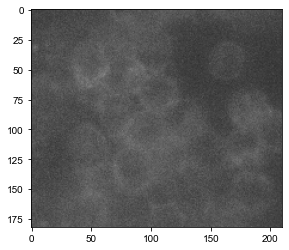

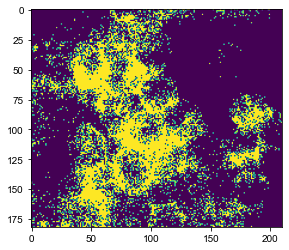

In [4]:
# testing out multiotsu thresholding
path = hem_path
im = imread(path)[0]
plt.figure()
plt.imshow(im, vmin=0, vmax=2000, cmap='gray')
plt.figure()
plt.imshow(im > threshold_multiotsu(im, 3)[1])

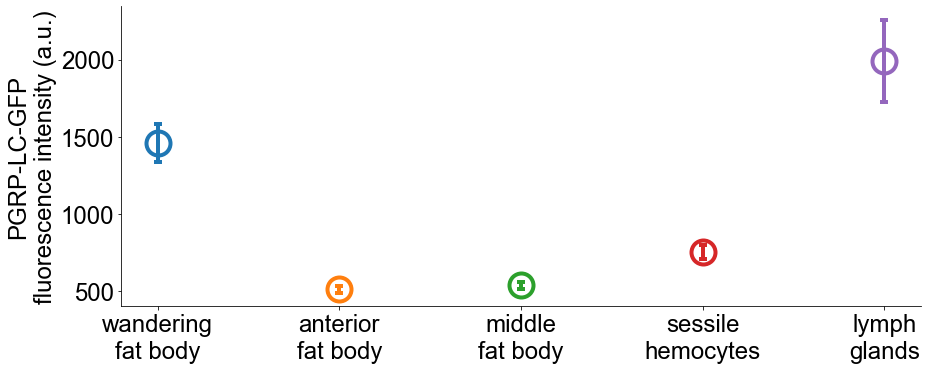

In [7]:
labels = ['wandering\nfat body', 'anterior\nfat body', 'middle\nfat body', 'sessile\nhemocytes', 'lymph\nglands']
plt.figure(figsize=(13.02,  5.25))
for i, path in enumerate(all_paths):
    im = imread(path)
    if path == hem_path:
        im = im[0]
    
    thresholds = threshold_multiotsu(im, 3)
    intens = im[im > thresholds[1]] #- thresholds[0]
    mean_inten = np.mean(intens)
    std_inten = np.std(intens)
    plt.errorbar(i, mean_inten, std_inten, marker='o', markersize=24, markeredgewidth=4, markerfacecolor='none', linewidth=4, elinewidth=4, capsize=4)

plt.xticks(np.arange(len(labels)), labels=labels, fontsize=fontsize)
plt.ylabel('PGRP-LC-GFP\nfluorescence intensity (a.u.)', fontsize=fontsize)
plt.yticks([500, 1000, 1500, 2000])
ax = style_axes(plt.gca(), fontsize=fontsize)
plt.tight_layout()
    

In [53]:
#plt.savefig(r'/home/brandon/Documents/Code/diptericin-paper/figures/Supplemental_Figures/pgrp-lc-gfp_fig/pgrp-lc-gfp-intensities.pdf')